# - EDA(Exploratory Data Analysis)


In [1]:
#필요한 패키지를 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (12, 12)

import warnings
warnings.filterwarnings('ignore')

## 0. 데이터 불러오기

In [21]:
## 데이터 불러오기
raw_data = pd.read_csv('data/최종데이터/최종_열삭제전.csv', encoding='utf-8', index_col=0)

raw_data

,광역시도명,날짜,요일,시간대별 시간,업종명,계절,공휴일,기념일,기온,풍속,...,눈비,강수량,확진자수,SO2,CO,O3,NO2,PM25,적설,주문건수
0,경기도,2019-07-17,수,0,도시락,여름,0,0,22.86,0.54,...,0,0.0,0.0,0.004,0.628,0.025,0.027,54.272,0.0,1
1,경기도,2019-07-17,수,11,도시락,여름,0,0,26.80,1.34,...,0,0.0,0.0,0.003,0.544,0.046,0.018,39.076,0.0,13
2,경기도,2019-07-17,수,12,도시락,여름,0,0,27.26,1.46,...,0,0.0,0.0,0.003,0.526,0.057,0.018,40.727,0.0,14
3,경기도,2019-07-17,수,13,도시락,여름,0,0,27.52,1.48,...,0,0.0,0.0,0.003,0.531,0.066,0.017,42.947,0.0,13
4,경기도,2019-07-17,수,14,도시락,여름,0,0,27.44,1.38,...,1,2.2,0.0,0.004,0.539,0.070,0.018,45.211,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226858,서울,2020-09-30,수,19,회,가을,1,0,19.00,2.70,...,1,29.5,30.0,0.003,0.428,0.034,0.018,21.120,0.0,7
226859,서울,2020-09-30,수,20,회,가을,1,0,18.40,1.90,...,1,4.5,30.0,0.003,0.420,0.032,0.016,20.040,0.0,11
226860,서울,2020-09-30,수,21,회,가을,1,0,18.20,0.70,...,0,0.0,30.0,0.003,0.444,0.023,0.018,16.680,0.0,3
226861,서울,2020-09-30,수,22,회,가을,1,0,17.60,1.50,...,0,0.0,30.0,0.002,0.424,0.017,0.019,14.320,0.0,7


In [22]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226863 entries, 0 to 226862
Data columns (total 24 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   광역시도명    226863 non-null  object 
 1   날짜       226863 non-null  object 
 2   요일       226863 non-null  object 
 3   시간대별 시간  226863 non-null  int64  
 4   업종명      226863 non-null  object 
 5   계절       226863 non-null  object 
 6   공휴일      226863 non-null  int64  
 7   기념일      226863 non-null  int64  
 8   기온       226863 non-null  float64
 9   풍속       226863 non-null  float64
 10  습도       226863 non-null  float64
 11  PM10     226863 non-null  float64
 12  운량       226863 non-null  float64
 13  날씨       226863 non-null  int64  
 14  눈비       226863 non-null  int64  
 15  강수량      226863 non-null  float64
 16  확진자수     226863 non-null  float64
 17  SO2      226863 non-null  float64
 18  CO       226863 non-null  float64
 19  O3       226863 non-null  float64
 20  NO2      226863 non-null  

## 1. 데이터 확인


<AxesSubplot:>

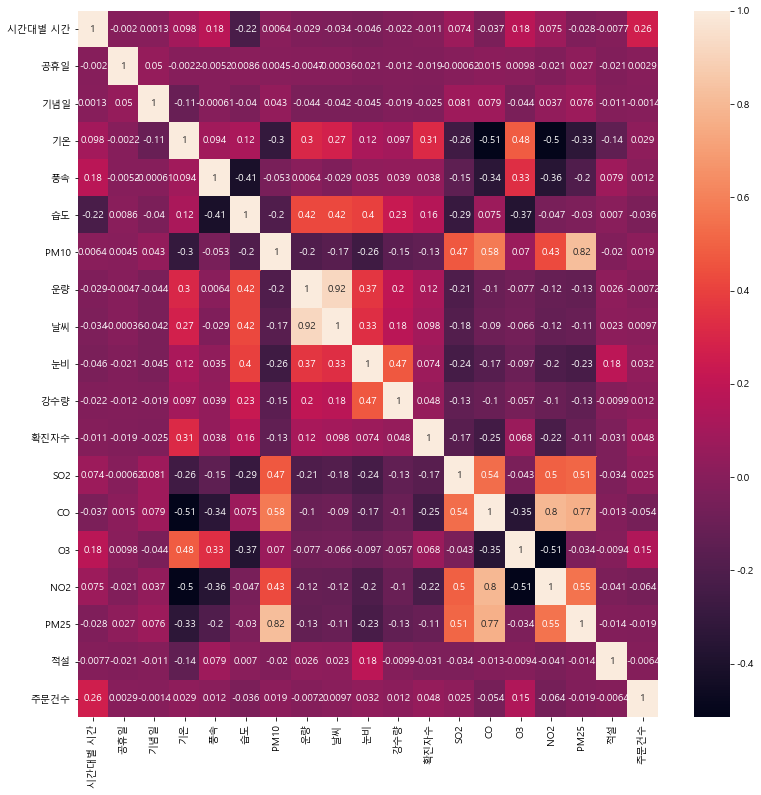

In [3]:
plt.figure(figsize=(13, 13))
sns.heatmap(raw_data.corr(), annot=True)

#### 1) SO2(이산화 황), CO(일산화탄소), O3(오존), NO2(이산화질소), PM25(초미세먼지)
* 위의 변수(대기 데이터)들은 배달에 많은 영향을 주지 않는다고 판단하였고, 또한 PM10으로 충분히 설명 가능하다고 판단하여 삭제

#### 2) 적설
* 눈이 안온 날이 훨씬 많고, 강수량 컬럼과 합쳐 눈비 컬럼으로 파생변수 생성하였으므로, 삭제

In [4]:
final_data = raw_data.drop(['SO2', 'CO', 'O3', 'NO2', 'PM25', '적설'], axis=1)

#### 3) 심부름
* 데이터 담당자에게 문의 결과 음식과 무관한 자동차 부품, 핸드폰과 같은 배달 주문이므로 제외

In [5]:
delete_index = final_data.loc[final_data['업종명']=='심부름'].index
final_data = final_data.drop(delete_index, axis=0)

final_data.reset_index(drop=True, inplace=True)

final_data

,광역시도명,날짜,요일,시간대별 시간,업종명,계절,공휴일,기념일,기온,풍속,습도,PM10,운량,날씨,눈비,강수량,확진자수,주문건수
0,경기도,2019-07-17,수,0,도시락,여름,0,0,22.86,0.54,91.2,79.512,6.4,3,0,0.0,0.0,1
1,경기도,2019-07-17,수,11,도시락,여름,0,0,26.80,1.34,71.6,58.013,9.2,4,0,0.0,0.0,13
2,경기도,2019-07-17,수,12,도시락,여름,0,0,27.26,1.46,71.4,57.240,9.8,4,0,0.0,0.0,14
3,경기도,2019-07-17,수,13,도시락,여름,0,0,27.52,1.48,69.8,60.360,9.8,4,0,0.0,0.0,13
4,경기도,2019-07-17,수,14,도시락,여름,0,0,27.44,1.38,72.6,64.595,10.0,4,1,2.2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221205,서울,2020-09-30,수,19,회,가을,1,0,19.00,2.70,90.0,31.320,10.0,4,1,29.5,30.0,7
221206,서울,2020-09-30,수,20,회,가을,1,0,18.40,1.90,91.0,27.520,5.0,2,1,4.5,30.0,11
221207,서울,2020-09-30,수,21,회,가을,1,0,18.20,0.70,91.0,22.720,7.0,3,0,0.0,30.0,3
221208,서울,2020-09-30,수,22,회,가을,1,0,17.60,1.50,92.0,19.600,6.0,3,0,0.0,30.0,7


## 2. 데이터 탐색

### 1) 전체 데이터


#### 1-1) 업종별 주문건수(전체 기간)

In [6]:
# 날짜 형변환
final_data['날짜'] = pd.to_datetime(final_data['날짜'])

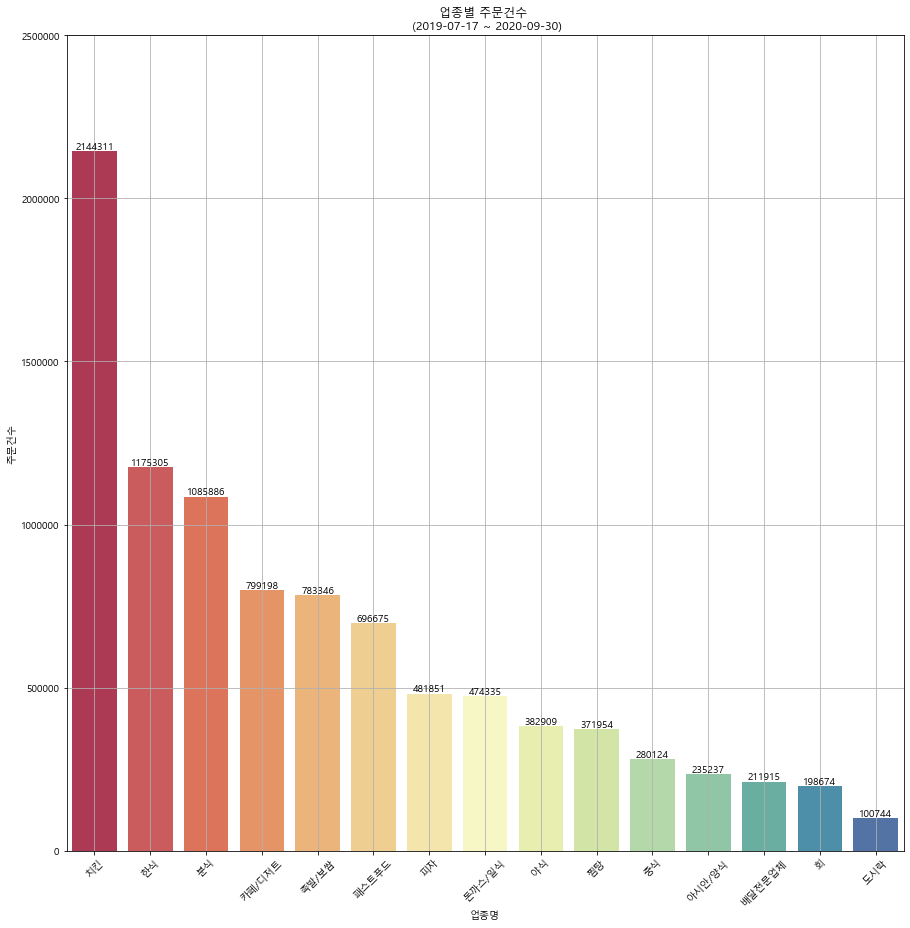

In [7]:
tmp = final_data.groupby(['업종명']).sum()[['주문건수']].sort_values(by='주문건수', ascending=False)

fig, ax = plt.subplots(figsize=(15, 15))

plt.title('업종별 주문건수 \n (2019-07-17 ~ 2020-09-30)')
sns.barplot(data=tmp, x=tmp.index, y='주문건수', palette='Spectral', ax=ax)

x = np.arange(len(tmp.index))
y = tmp['주문건수']

for j, v in enumerate(x):
        plt.text(v, y[j], y[j],
               fontsize=10, color='black', 
               horizontalalignment='center',
               verticalalignment='bottom')
        
        
ax.ticklabel_format(style='plain', axis='y')
plt.yticks(np.arange(0, 3000000, 500000))
plt.xticks(rotation=45)
plt.grid()
plt.show()



#### 1-2) 연도 / 업종별 주문건수

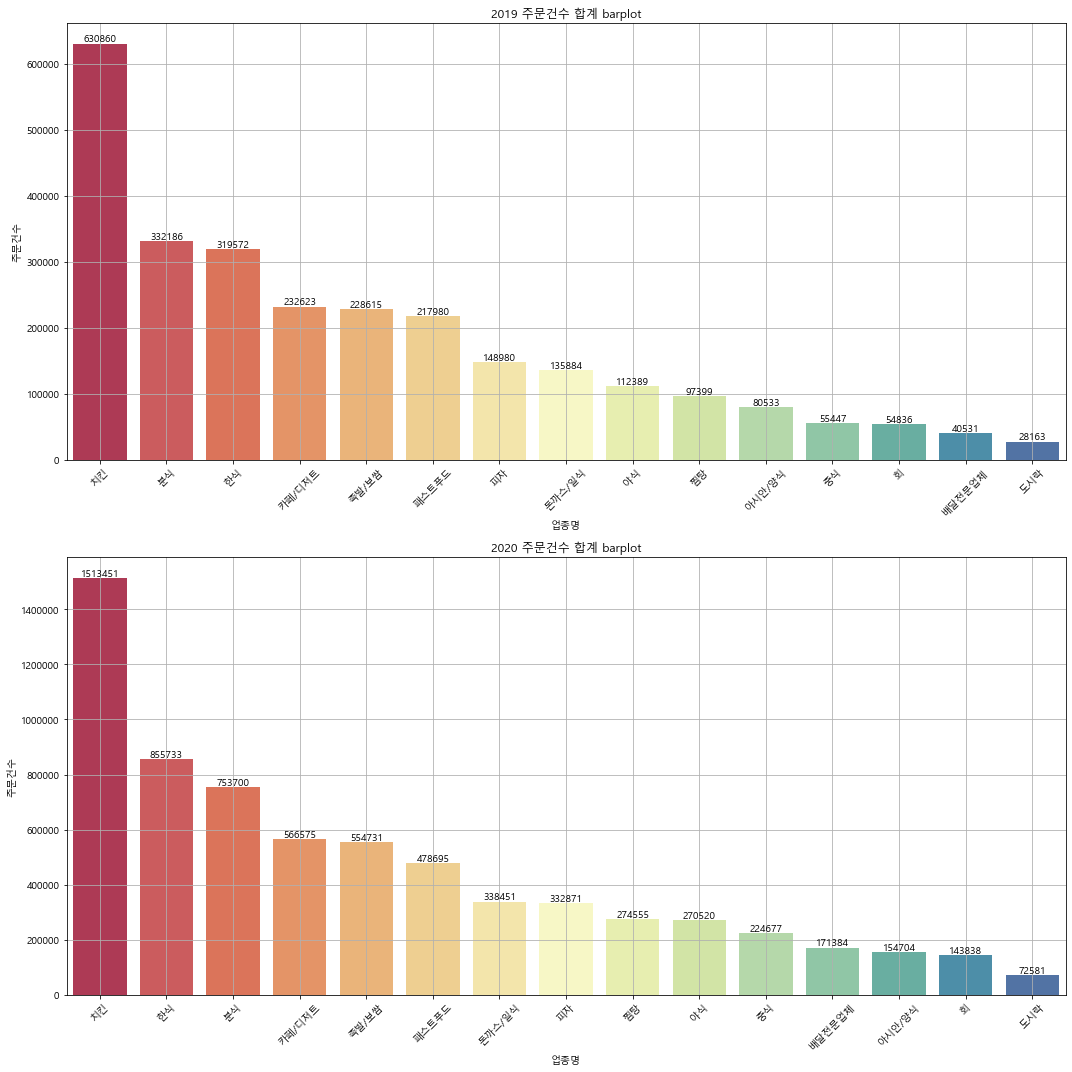

In [8]:
year = [2019, 2020]
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

for ax, yr in zip(axes.ravel(),year):
    temp = final_data.loc[final_data['날짜'].dt.year == yr].groupby(['업종명']).sum()[['주문건수']].sort_values(by='주문건수', ascending=False)
    index = temp.index
    sns.barplot(x=index, y=temp['주문건수'],data=temp, palette='Spectral', ax=ax)

    
    x = np.arange(len(temp.index))
    y = temp['주문건수']

    for j, v in enumerate(x):
        ax.text(v, y[j], y[j],
               fontsize=10, color='black', 
               horizontalalignment='center',
               verticalalignment='bottom')
        
        ax.ticklabel_format(style='plain', axis='y')
        ax.set_xticklabels(temp.index, rotation=45)
        ax.set_title(str(yr)+' '+'주문건수 합계 barplot')
        ax.grid()
        plt.tight_layout()


### 2) 지역별 비교

#### - 지역 비교를 위한 사용자 함수 정의

In [9]:
### 사용자 함수 정의

def bar_plotting(df=None, X=None, aggfunc=sum, figsize=(12, 12)):
    
    area = ['서울', '경기도']
    
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    for i, ax in enumerate(axes.ravel()):
        
        tmd_df = df.loc[df['광역시도명']==area[i]]
        
        if X == '계절':
            data = np.round(tmd_df.groupby(X).agg({'주문건수':aggfunc}).reindex(['봄', '여름', '가을', '겨울']), 3)
        elif X== '업종명':
            data = tmd_df.groupby(X).agg({'주문건수':aggfunc}).sort_values(by='주문건수', ascending=False)
        else:
            data = np.round(tmd_df.groupby(X).agg({'주문건수':aggfunc}), 3)
            
        sns.barplot(x=data.index, y=data['주문건수'], data=data, palette='deep', ax=ax)
        
        x = np.arange(len(data.index))
        y = data['주문건수']

        for j, v in enumerate(x):
            ax.text(v, y[j]+0.2, y[j],
                   fontsize=10, color='black', 
                   horizontalalignment='center',
                   verticalalignment='bottom')
            ax.ticklabel_format(style='plain', axis='y')
            ax.set_title(area[i]+ ' '+ X +' barplot')
            ax.set_xticklabels(data.index, rotation=45)
            
        ax.grid()
        plt.tight_layout()

#### 1) 서울/경기 업종별 전체 주문건수

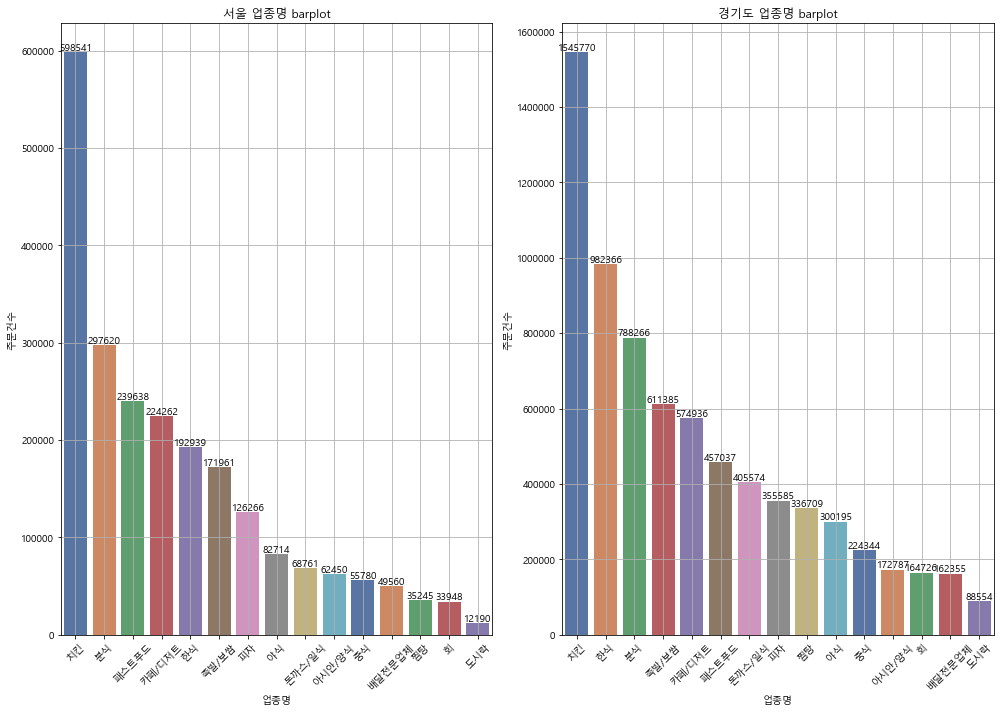

In [10]:
bar_plotting(df=final_data, X='업종명', aggfunc=sum, figsize=(14, 10))

#### 2) 서울/경기 시간대별 전체 주문건수

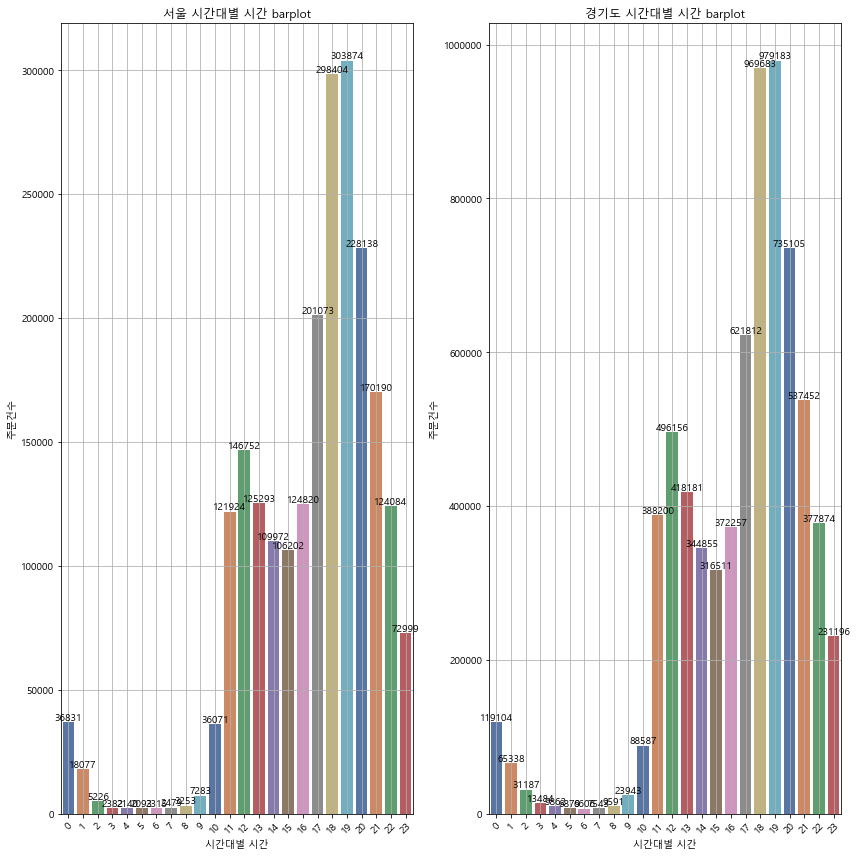

In [11]:
bar_plotting(df=final_data, X='시간대별 시간', aggfunc=sum)

#### 3) 서울/경기 계절별 주문 건수

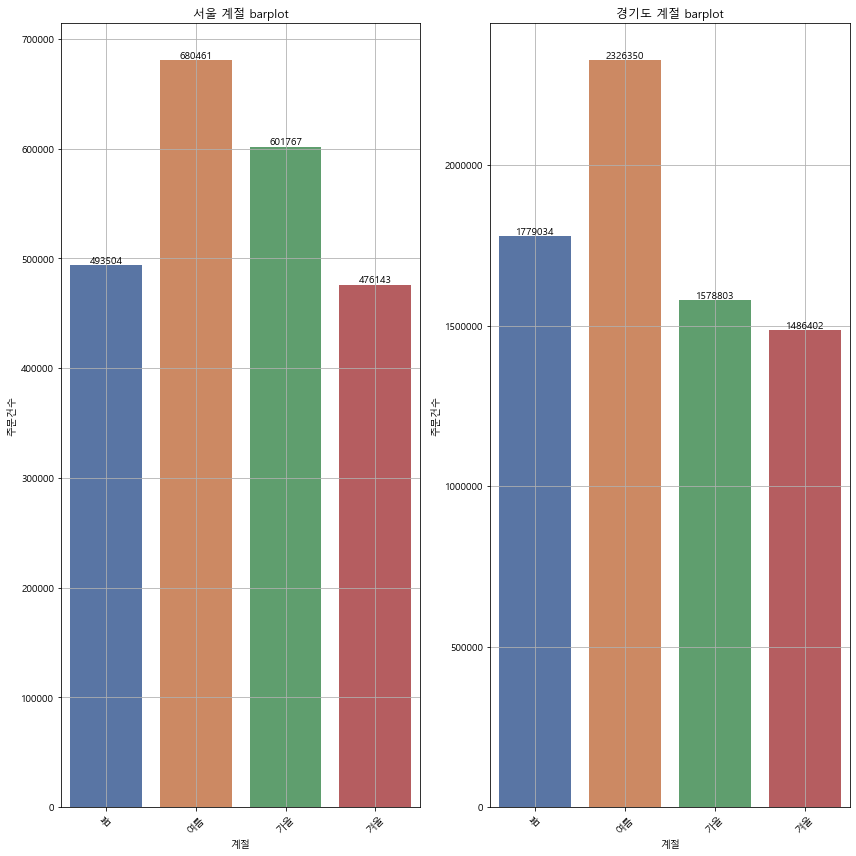

In [12]:
bar_plotting(df=final_data, X='계절', aggfunc=sum)

<AxesSubplot:xlabel='기온', ylabel='Density'>

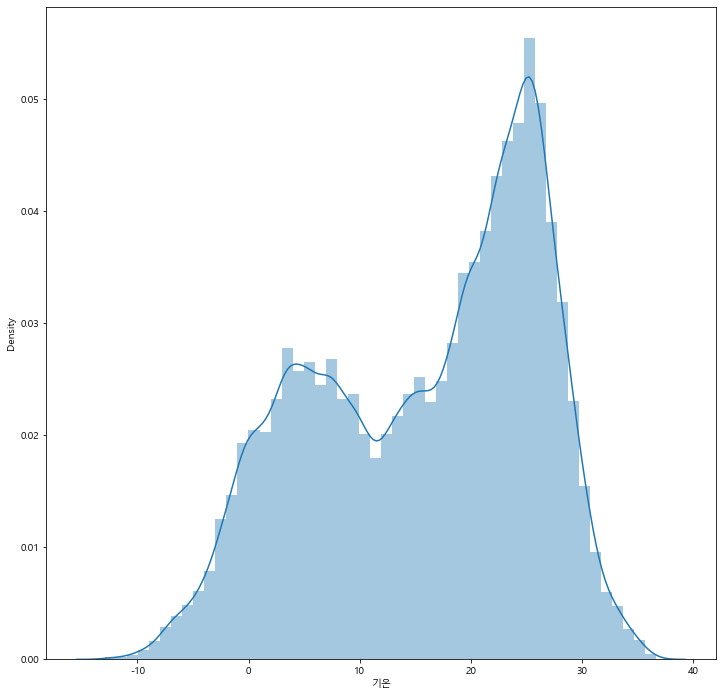

In [14]:
sns.distplot(final_data['기온'])

<AxesSubplot:xlabel='주문건수', ylabel='Density'>

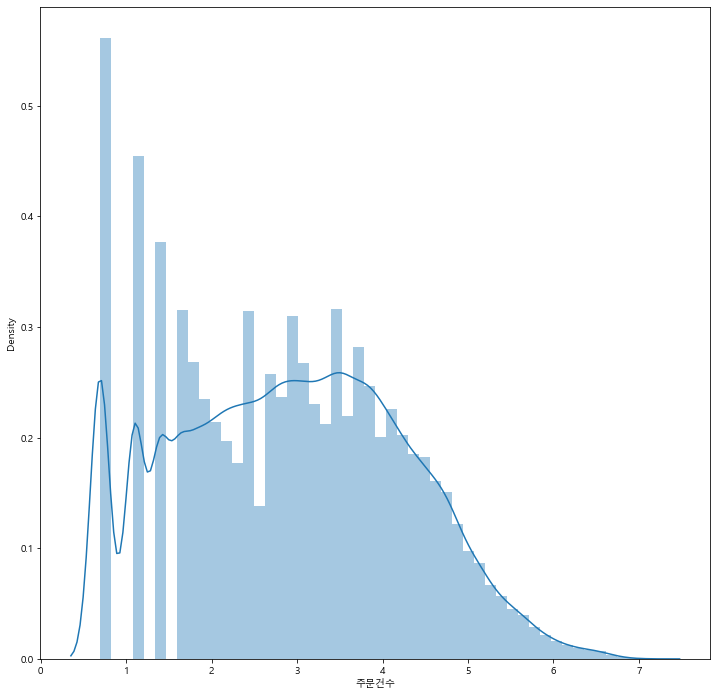

In [15]:
sns.distplot(np.log1p(final_data['주문건수']))

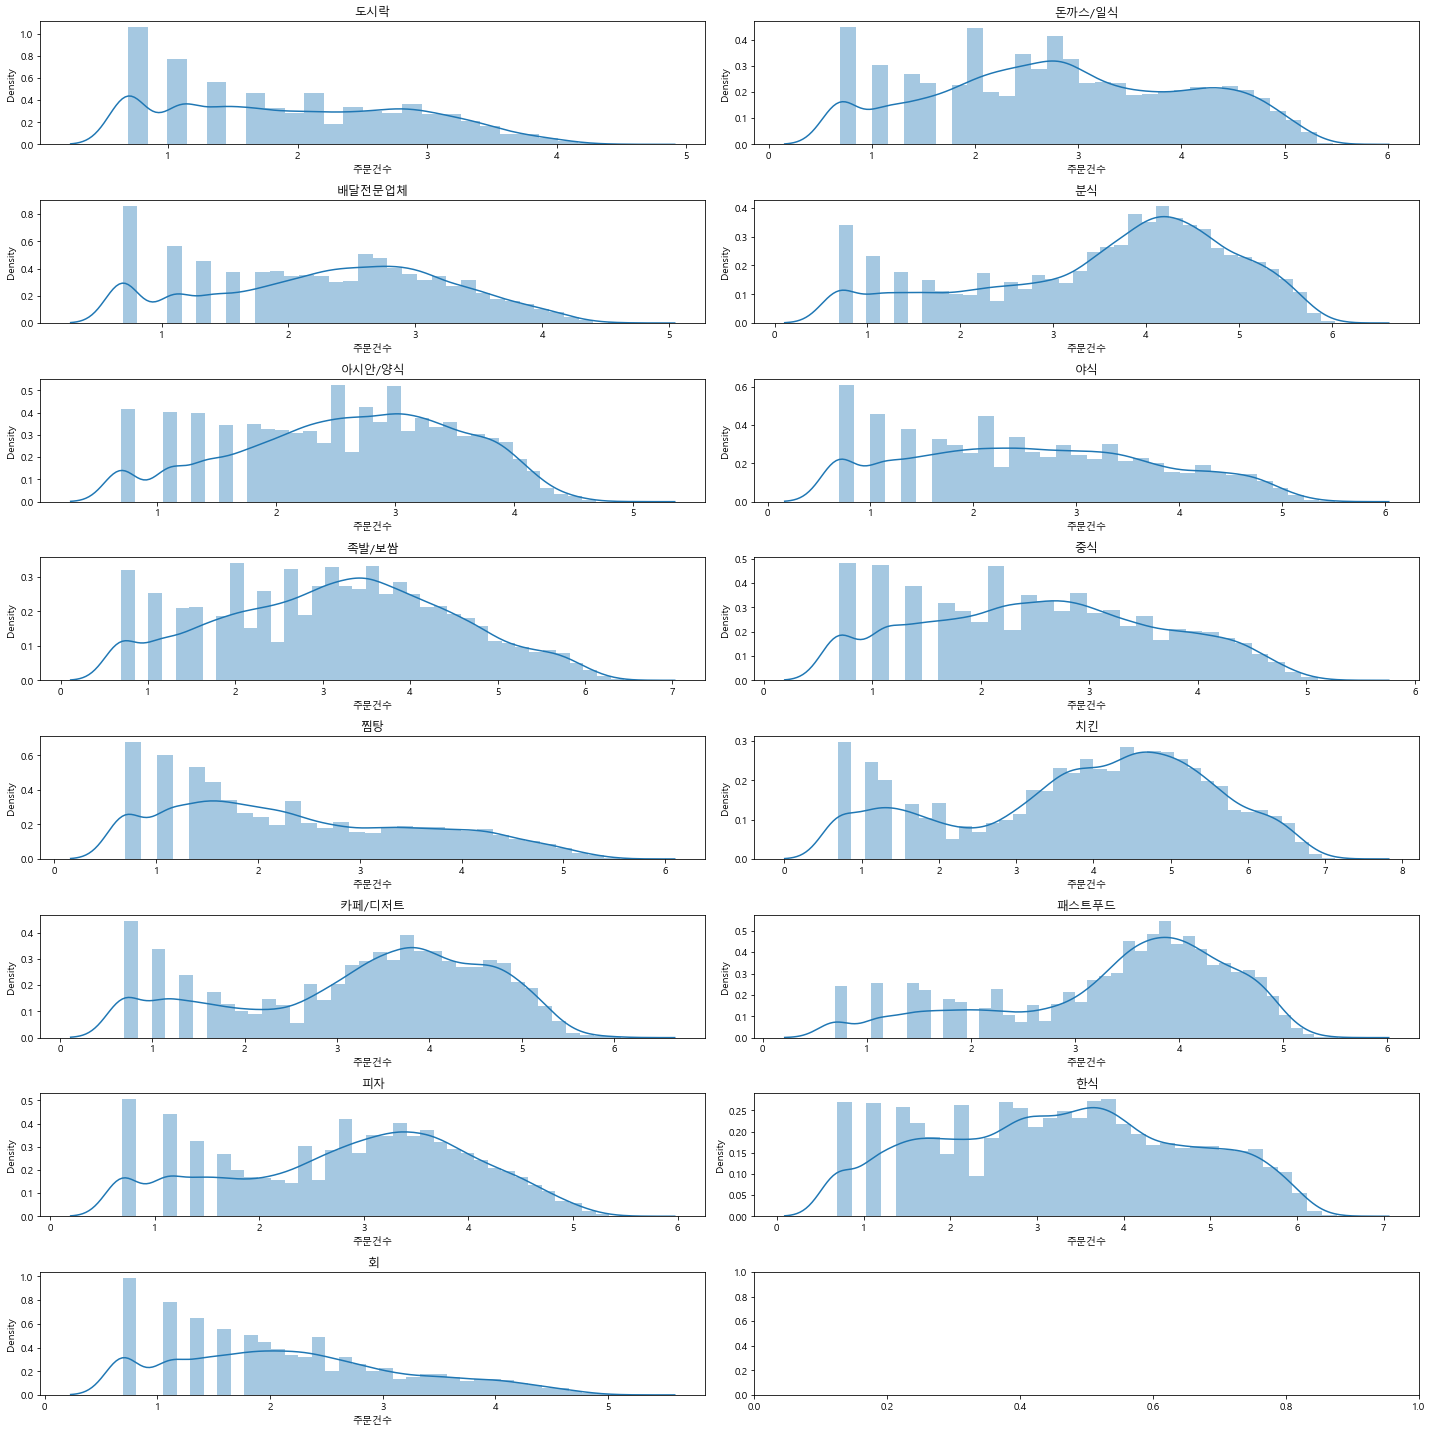

In [16]:
columns = np.unique(final_data['업종명'])

fig, axes = plt.subplots(8, 2, figsize=(20, 20))

ax = axes.ravel()

for i, column in enumerate(columns):
    ax[i].set_title(columns[i])
    sns.distplot(np.log1p(final_data.loc[(final_data['업종명']==columns[i])]['주문건수']), ax=ax[i])
    plt.tight_layout()
        
    

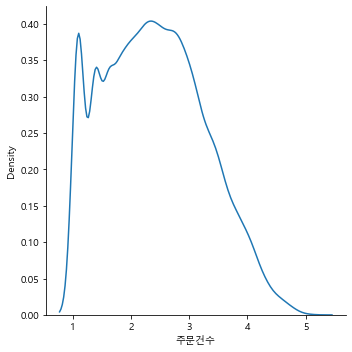

In [17]:

tmp = final_data.loc[(np.isin(final_data['업종명'], ['도시락', '회', '배달전문업체'])) & (final_data['주문건수'] >=2)]
tmp.loc[:, '업종명'] = '기타'

sns.displot(np.log1p(tmp['주문건수']), kind='kde')

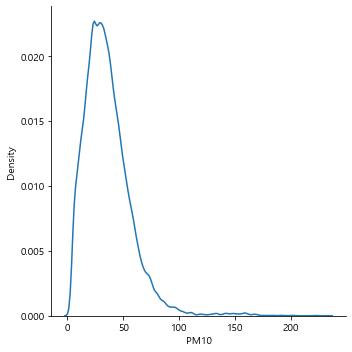

In [18]:
sns.displot(final_data['PM10'], kind='kde')

In [19]:
from scipy.stats import skew

# Object가 아닌 숫자형 feature의 컬럼 index 추출

features_index = final_data.dtypes[(final_data.dtypes != 'object') ].index
features_index


Index(['날짜', '시간대별 시간', '공휴일', '기념일', '기온', '풍속', '습도', 'PM10', '운량', '날씨',
       '눈비', '강수량', '확진자수', '주문건수'],
      dtype='object')

In [20]:
skew_features = final_data[features_index].apply(lambda x: skew(x))

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

In [ ]:
skew_features_top = skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))

In [ ]:
sns.violinplot(x='시간대별 시간', y='주문건수', data=final_data)

In [ ]:
sns.boxplot(x='계절', y='주문건수', data=final_data)

In [ ]:
sns.boxplot(x='계절', y='주문건수', data=final_data)

In [ ]:
sns.boxplot(x='기념일', y='주문건수', data=final_data)

In [ ]:
pd.get_dummies(final_data[['요일', '시간대별 시간', '계절', '공휴일', '기념일', '날씨', '눈비']])

dummy_dict = {'요일': 'day', '시간대별 시간': 'time', '계절': 'season', '공휴일' : 'holiday', '기념일' : 'holiday2', '날씨' : 'climate', '눈비': 'rain_snow'}

def get_all_dummies(data=None, dummy_dict=None):
    df = pd.DataFrame()
    
    for dummy in list(dummy_dict.keys()):
        
        tmp_df = pd.get_dummies(data[dummy], prefix=dummy_dict[dummy])
        
        df = pd.concat([df, tmp_df], axis=1)
        
    return df
        

In [ ]:
dummies = get_all_dummies(final_data, dummy_dict)

In [ ]:
temp = pd.concat([final_data, dummies], axis=1)

temp.drop(list(dummy_dict.keys()), axis=1, inplace=True)

In [ ]:
chicken = temp.loc[temp['업종명']=='배달전문업체']

chicken_sl = chicken.loc[chicken['광역시도명']=='서울']
chicken_gg = chicken.loc[chicken['광역시도명']=='경기도']

In [ ]:
chicken_sl_fin = chicken_sl.drop(['광역시도명', '업종명', '날짜'], axis=1)
chicken_gg_fin = chicken_gg.drop(['광역시도명', '업종명', '날짜'], axis=1)

In [ ]:
chicken_gg_fin

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


y_target = chicken_gg_fin['주문건수']
X_features = chicken_gg_fin.drop('주문건수', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, np.log1p(y_target), test_size=0.2, random_state=156)

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
lr.coef_

In [ ]:
for column, coef in zip(X_features.columns, lr.coef_):
    print(column, np.round(coef, 3))

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

In [ ]:
for column, coef in zip(X_features.columns, lr.coef_):
    print(column, np.round(coef, 3))

In [ ]:
ridge = Ridge()

ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

In [ ]:
for column, coef in zip(X_features.columns, ridge.coef_):
    print(column, np.round(coef, 3))

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf_lr = RandomForestRegressor(max_depth=10)

rf_lr.fit(X_train, y_train)


rf_lr.score(X_train, y_train)


In [ ]:
rf_lr.score(X_test, y_test)